In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor

In [2]:
df = pd.read_csv("granite_600_rows.csv")

print(df.shape)
df.head()


(600, 5)


,Sq. Ft,Nos,wasted_nos,waste %,wasted %(sqft.)
0,333.069672,21,3,14.2857,47.5813
1,634.155988,22,2,9.0909,57.6505
2,418.693744,28,3,10.7143,44.8601
3,601.251070,21,3,14.2857,85.8929
4,461.529387,17,2,11.7647,54.2975


In [3]:
sqfeet_cols = [col for col in df.columns if col.startswith("Sq.")]
print(sqfeet_cols)
Nos_cols = [col for col in df.columns if col.startswith("Nos")]
print(Nos_cols)
WastedNos_cols = [col for col in df.columns if col.startswith("wasted_")]
print(WastedNos_cols)

['Sq. Ft']
['Nos']
['wasted_nos']


In [4]:
feature_cols = (
    sqfeet_cols + Nos_cols
)

X = df[feature_cols]
y = df["waste %"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.10,
    random_state=42
)


In [6]:
from sklearn.metrics import mean_squared_error
import numpy as np

def evaluate(model, X_test, y_test, sample_weight=None):
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"RMSE: {rmse:.4f}")
    
    if sample_weight is not None:
        wrmse = np.sqrt(
            np.average((y_test - y_pred)**2, weights=sample_weight)
        )
        print(f"Weighted RMSE: {wrmse:.4f}")
    
    return y_pred


In [7]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=300,
    max_depth=8,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)
y_pred = evaluate(model, X_test, y_test)


RMSE: 2.7272


In [8]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE: {rmse:.4f}")


RMSE: 2.7272


In [9]:
feature_importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance


Sq. Ft    0.704366
Nos       0.295634
dtype: float64

<Axes: title={'center': 'Feature Importance'}>

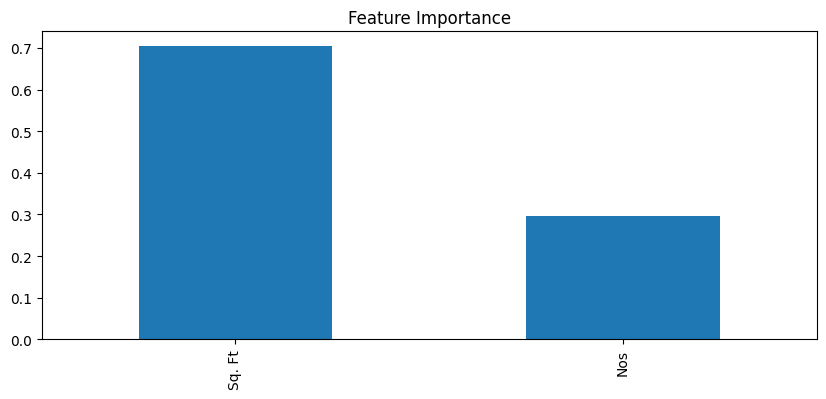

In [10]:
feature_importance.plot(kind="bar", figsize=(10, 4), title="Feature Importance")


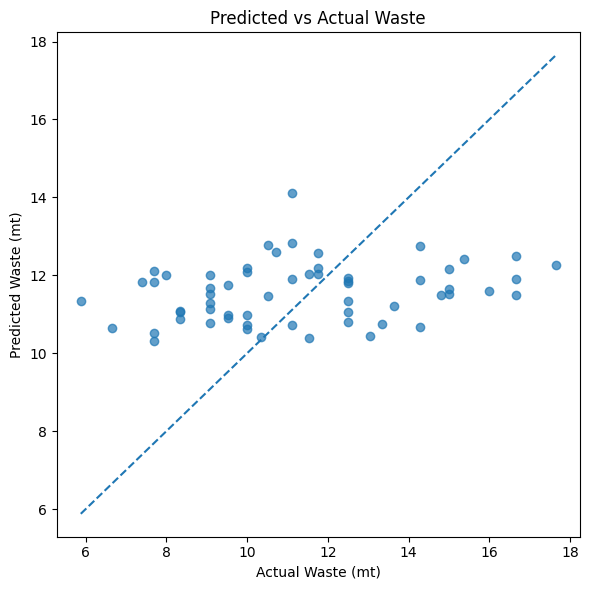

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--"
)

plt.xlabel("Actual Waste (mt)")
plt.ylabel("Predicted Waste (mt)")
plt.title("Predicted vs Actual Waste")

plt.tight_layout()
plt.show()


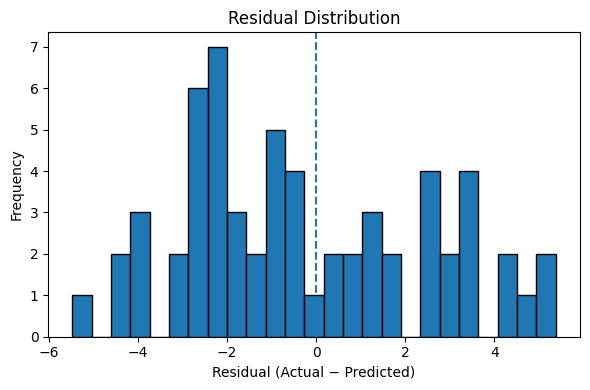

In [12]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=25, edgecolor="black")
plt.axvline(0, linestyle="--")

plt.xlabel("Residual (Actual − Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")

plt.tight_layout()
plt.show()


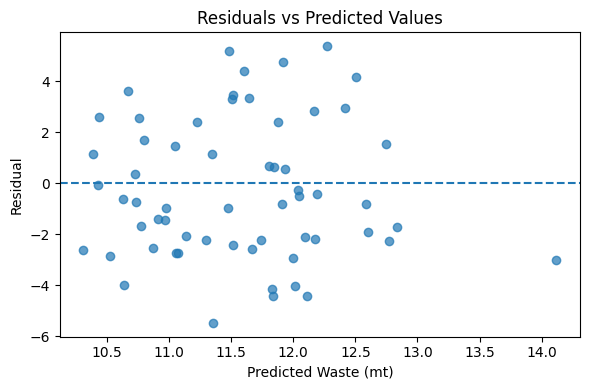

In [13]:
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, linestyle="--")

plt.xlabel("Predicted Waste (mt)")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted Values")

plt.tight_layout()
plt.show()


In [14]:
import joblib

joblib.dump(model, "graniteModel_v1.joblib")

['graniteModel_v1.joblib']